# Lead Score Dataset

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [3]:
#for expanding/displaying rows and columns 
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [4]:
lead=pd.read_csv("Leads.csv")
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
lead.shape

(9240, 37)

In [6]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# Data Cleaning

In [9]:
#dropping Lead Number and Prospect ID since they have all unique values
lead.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [10]:
#Converting 'Select' values to NaN because select is not giving us any information so it is better repacle with null values
lead = lead.replace('Select', np.nan)

In [11]:
#checking Duplicates
print(lead.duplicated(subset=None, keep='first'))

0       False
1       False
2       False
3       False
4       False
        ...  
9235    False
9236    False
9237    False
9238    False
9239    False
Length: 9240, dtype: bool


So, There is no duplicates in the dataset.

In [12]:
#checking null values
lead.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [13]:
#checking again null values in percentage format
round(100*(lead.isnull().sum()/len(lead.index)),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [14]:
#Remove those columns who have more than 45% null values
lead= lead.drop(lead.loc[:,list(round(100*(lead.isnull().sum()/len(lead.index)), 2)>45)].columns, 1)

In [15]:
round(100*(lead.isnull().sum()/len(lead.index)),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [16]:
lead.shape

(9240, 28)

In [17]:
lead['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
unknown                    5
South Africa               4
Kuwait                     4
Canada                     4
Germany                    4
Nigeria                    4
Sweden                     3
Bangladesh                 2
Uganda                     2
Italy                      2
Ghana                      2
Asia/Pacific Region        2
Philippines                2
China                      2
Netherlands                2
Belgium                    2
Russia                     1
Malaysia                   1
Liberia                    1
Tanzania                   1
Kenya                      1
Vietnam       

# EDA (Data Visualization)


### Univariate and Bivariate Analysis

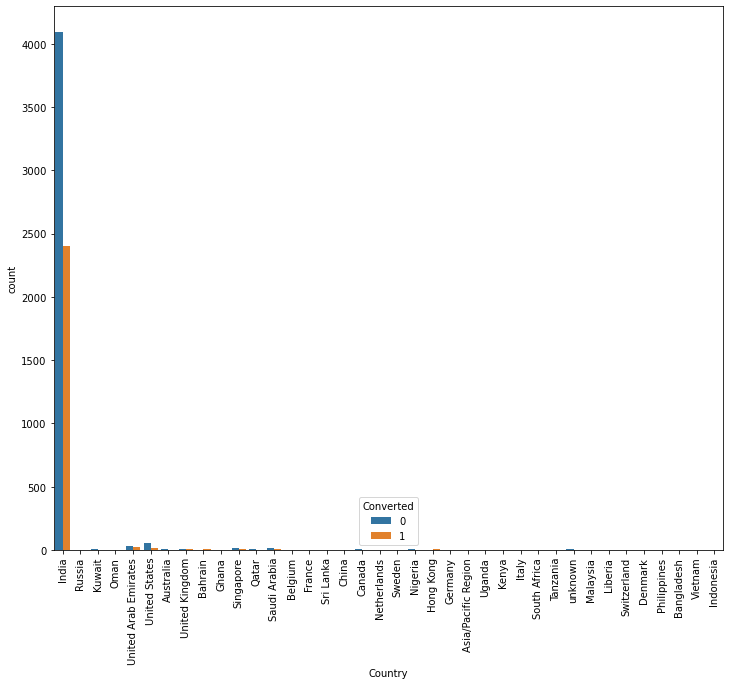

In [18]:
#Lets check the countires with target variable(converted)
plt.figure(figsize=(12,10))
sns.countplot(x='Country', hue='Converted', data=lead)
plt.xticks(rotation='vertical')
plt.show()

As per above graph we can see that India is the most commom eventand have the non-missing values.

In [19]:
#So we can impute all missing values of India
lead['Country']=lead['Country'].replace(np.nan, 'India')

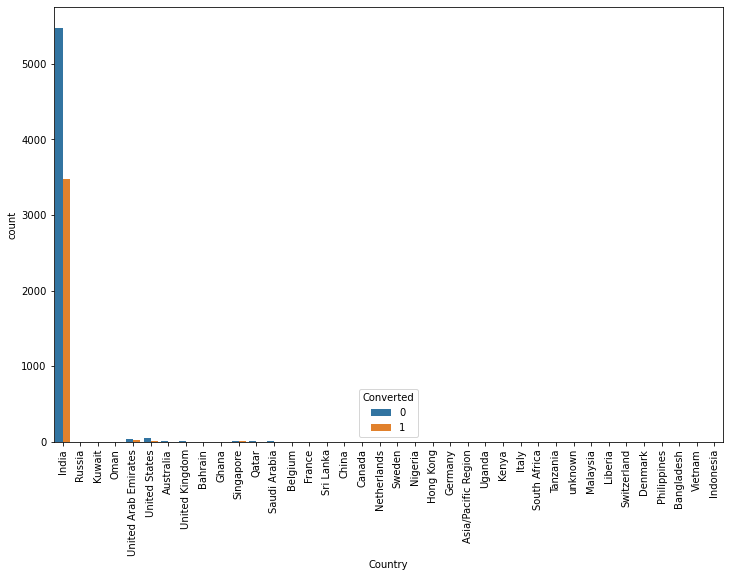

In [20]:
#after replacing values.
plt.figure(figsize=(12,8))
sns.countplot(x='Country', hue='Converted', data=lead)
plt.xticks(rotation='vertical')
plt.show()

As we can see in the above graph India have the high values so, it is better to drop them.

In [21]:
#creating a list of columns to be droppped
cols_to_drop=['Country']

In [22]:
#Now lets check the City columns
lead['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [23]:
#Replacing NaN values with mumbai
lead['City']=lead['City'].replace(np.nan, 'Mumbai')

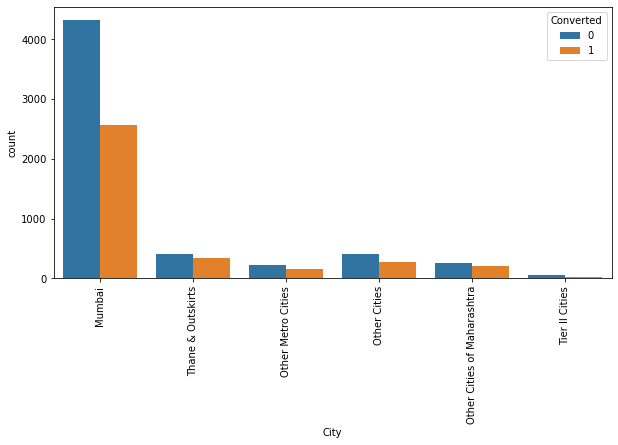

In [24]:
plt.figure(figsize=(10,5))
sns.countplot(x='City', hue='Converted', data=lead)
plt.xticks(rotation='vertical')
plt.show()

In [25]:
#Now lets check the What is your current occupation column
lead['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [26]:
#Replacing NaN values with Unemployed
lead['What is your current occupation'] = lead['What is your current occupation'].replace(np.nan, 'Unemployed')

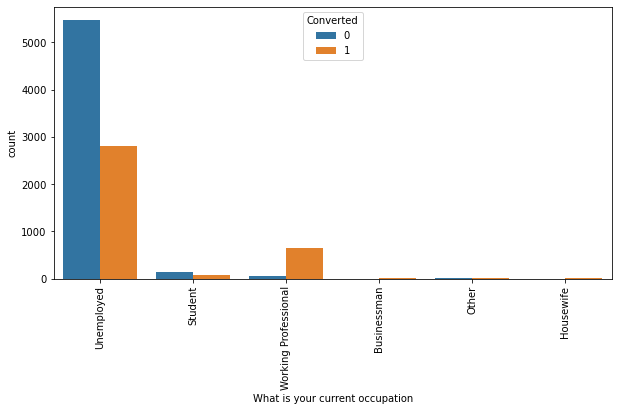

In [27]:
plt.figure(figsize=(10,5))
sns.countplot(x='What is your current occupation', hue='Converted', data=lead)
plt.xticks(rotation='vertical')
plt.show()

In [28]:
#check again value counts
lead['What is your current occupation'].value_counts(dropna=False)

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [29]:
#lets check What matters most to you in choosing a course column
lead['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [30]:
#Replace NaN values with Better Career Prospects values
lead['What matters most to you in choosing a course'] = lead['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

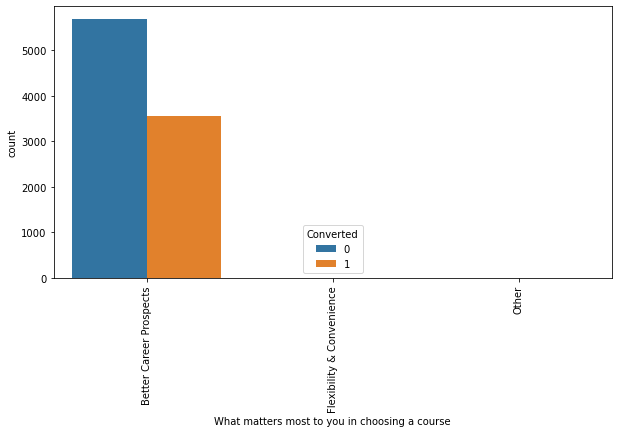

In [31]:
plt.figure(figsize=(10,5))
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data=lead)
plt.xticks(rotation='vertical')
plt.show()

In [32]:
#checking again values of What matters most to you in choosing a course
lead['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [33]:
#Here again we have another Column that is worth Dropping. So we Append to the cols_to_drop List
cols_to_drop.append('What matters most to you in choosing a course')
cols_to_drop

['Country', 'What matters most to you in choosing a course']

In [34]:
#Now lets check Tags column
lead['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [35]:
#Replacing NaN values with "Not Sure"
lead['Tags']=lead['Tags'].replace(np.nan, 'Not Sure')

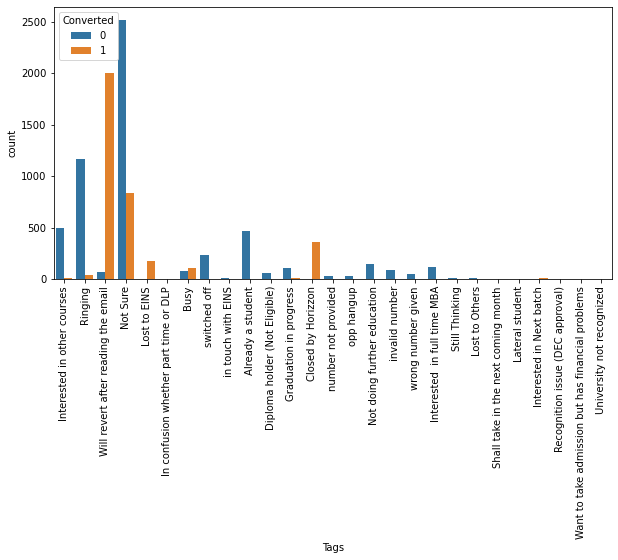

In [36]:
#plotting
plt.figure(figsize=(10,5))
sns.countplot(x='Tags', hue='Converted', data=lead)
plt.xticks(rotation='vertical')
plt.show()

In [37]:
#replacing tags with low frequency with "Other Tags"
lead['Tags'] = lead['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized', 'switched off',
                                      'Already a student',
                                       'Not doing further education',
                                       'invalid number',
                                       'wrong number given',
                                       'Interested  in full time MBA'], 'Other_Tags')

In [38]:
#Checking again vale counts of Tags
lead['Tags'].value_counts(dropna=False)

Not Sure                               3353
Will revert after reading the email    2072
Other_Tags                             1380
Ringing                                1203
Interested in other courses             513
Closed by Horizzon                      358
Busy                                    186
Lost to EINS                            175
Name: Tags, dtype: int64

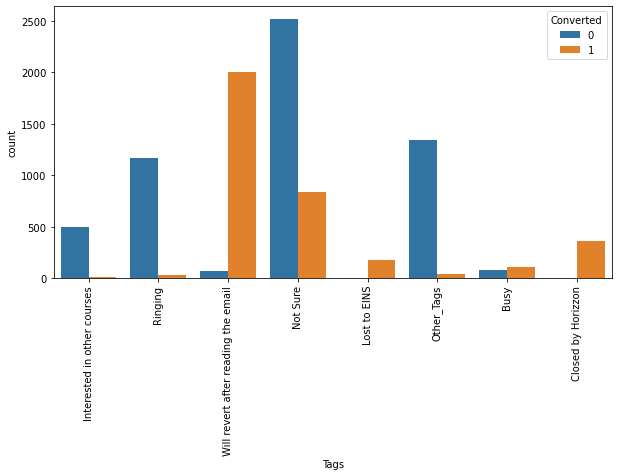

In [39]:
#plotting again
plt.figure(figsize=(10,5))
sns.countplot(x='Tags', hue='Converted', data=lead)
plt.xticks(rotation='vertical')
plt.show()

Above chart is now is showing all the mergings we did above is in Other_Tags.

In [40]:
#Now lets check Specialization column
lead['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [41]:
#Replace NaN values with 'Not Specified' because some the student is not mentioned their specialization
lead['Specialization']=lead['Specialization'].replace(np.nan, 'Not Specified')

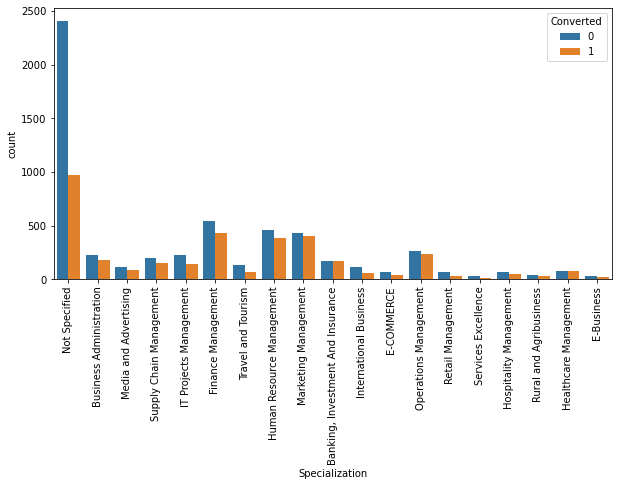

In [42]:
plt.figure(figsize=(10,5))
sns.countplot(x='Specialization', hue='Converted', data=lead)
plt.xticks(rotation='vertical')
plt.show()

In [43]:
#combining Management Specializations because they show similar trends
lead['Specialization'] = lead['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management_Specializations')

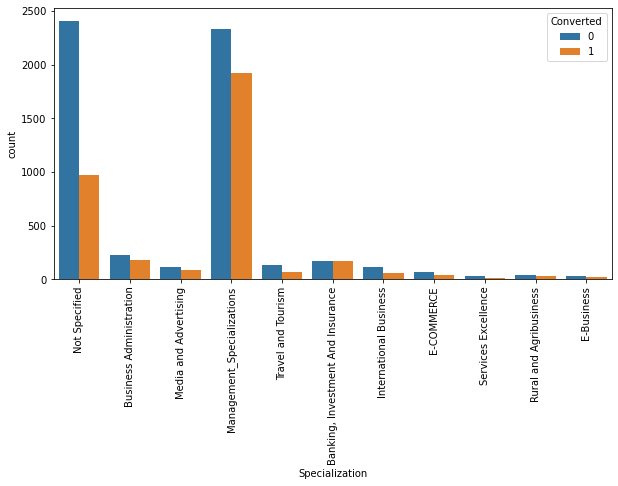

In [44]:
plt.figure(figsize=(10,5))
sns.countplot(x='Specialization', hue='Converted', data=lead)
plt.xticks(rotation='vertical')
plt.show()

The above chart is showing that the specialization is now more frequent way to check the merging of management specialization.

In [45]:
#Check again the percentage of missing values.
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

Still some missing values left in the dataset.

In [46]:
#Now lets check the Lead Source column
lead['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Live Chat               2
Social Media            2
welearnblog_Home        1
WeLearn                 1
youtubechannel          1
NC_EDM                  1
Pay per Click Ads       1
blog                    1
testone                 1
Name: Lead Source, dtype: int64

In [47]:
#Replacing Nan Values with low frequency values
lead['Lead Source'] = lead['Lead Source'].replace(np.nan,'Others')
lead['Lead Source'] = lead['Lead Source'].replace('google','Google')
lead['Lead Source'] = lead['Lead Source'].replace('Facebook','Social Media')
lead['Lead Source'] = lead['Lead Source'].replace(['bing','Click2call','Press_Release','youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'] ,'Others') 

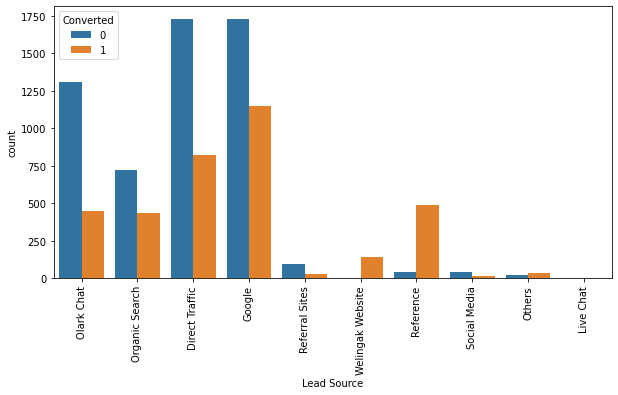

In [48]:
plt.figure(figsize=(10,5))
sns.countplot(x='Lead Source', hue='Converted', data=lead)
plt.xticks(rotation='vertical')
plt.show()

So, The most important column is Lead Source beacuse we can contact with the intrested person here.
Some inferences are:
- Google and Direct Traffic is the highest number of leads.
- Olark chat and Organic Search is to improve for conversion rate and for focus area.

In [49]:
# Now Lets check the Last Activity column
lead['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [50]:
#Replace Nan Values with low frequency values
lead['Last Activity'] = lead['Last Activity'].replace(np.nan,'Others')
lead['Last Activity'] = lead['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation', 
                                                        'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

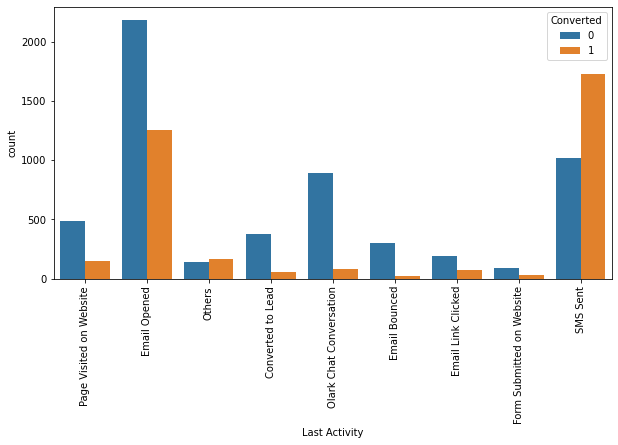

In [51]:
plt.figure(figsize=(10,5))
sns.countplot(x='Last Activity', hue='Converted', data=lead)
plt.xticks(rotation='vertical')
plt.show()

In [52]:
#Now its time to Drop all rows which have Nan Values. Since the number of Dropped rows is less than 2%.
#it will not affect the model.
lead=lead.dropna()

In [53]:
round(100*(lead.isnull().sum()/len(lead.index)),2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

So, all the null values is handled.

In [54]:
#Check the Lead Origin values
lead['Lead Origin'].value_counts(dropna=False)

Landing Page Submission    4886
API                        3578
Lead Add Form               608
Lead Import                  31
Name: Lead Origin, dtype: int64

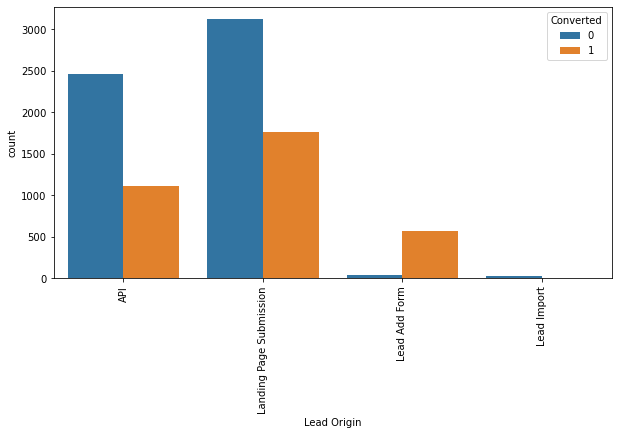

In [55]:
plt.figure(figsize=(10,5))
sns.countplot(x='Lead Origin', hue='Converted', data=lead)
plt.xticks(rotation='vertical')
plt.show()

Inferences:
- API and Landing Page Submission bring higher number of leads as well as conversion.
- In order to improve overall lead conversion rate, we have to improve lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.
- Lead Import and Quick Add Form get very few leads.
- Lead Add Form has a very high conversion rate but count of leads are not very high.

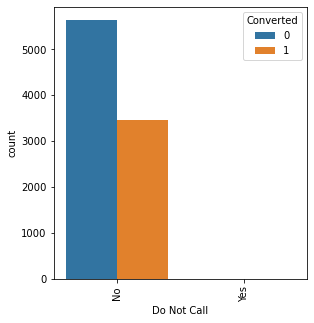

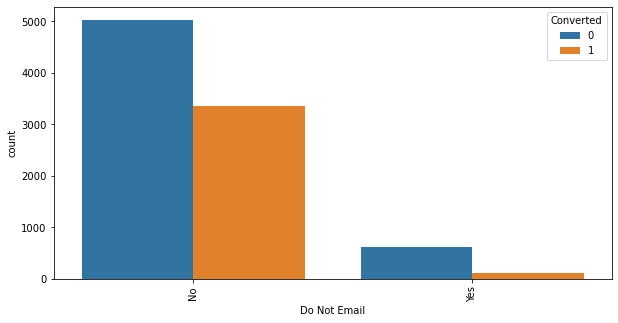

In [56]:
#Now checking count variables of Do not call and Do not email based on Converted value
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x='Do Not Call', hue='Converted', data=lead)
plt.xticks(rotation='vertical')

plt.figure(figsize=(10,5))
sns.countplot(x='Do Not Email', hue='Converted', data=lead)
plt.xticks(rotation='vertical')
plt.show()

In [57]:
#Checking values of Do Not Call
lead['Do Not Call'].value_counts()

No     9101
Yes       2
Name: Do Not Call, dtype: int64

We can append Do Not Call in droping dataframe because No values is 90% is only one value

In [58]:
cols_to_drop.append('Do Not Call')
cols_to_drop

['Country', 'What matters most to you in choosing a course', 'Do Not Call']

In [59]:
#Checking values of Do Not Email
lead['Do Not Email'].value_counts()

No     8379
Yes     724
Name: Do Not Email, dtype: int64

#### Checking and dropping Imbalanced Variables 

In [60]:
lead['Search'].value_counts(dropna=False)

No     9089
Yes      14
Name: Search, dtype: int64

In [61]:
lead['Magazine'].value_counts(dropna=False)

No    9103
Name: Magazine, dtype: int64

In [62]:
lead['Newspaper Article'].value_counts(dropna=False)

No     9101
Yes       2
Name: Newspaper Article, dtype: int64

In [63]:
lead['X Education Forums'].value_counts(dropna=False)

No     9102
Yes       1
Name: X Education Forums, dtype: int64

In [64]:
lead['Newspaper'].value_counts(dropna=False)

No     9102
Yes       1
Name: Newspaper, dtype: int64

In [65]:
lead['Digital Advertisement'].value_counts(dropna=False)

No     9099
Yes       4
Name: Digital Advertisement, dtype: int64

In [66]:
lead['Through Recommendations'].value_counts(dropna=False)

No     9096
Yes       7
Name: Through Recommendations, dtype: int64

In [67]:
lead['Receive More Updates About Our Courses'].value_counts(dropna=False)

No    9103
Name: Receive More Updates About Our Courses, dtype: int64

In [68]:
lead['Update me on Supply Chain Content'].value_counts(dropna=False)

No    9103
Name: Update me on Supply Chain Content, dtype: int64

In [69]:
lead['Get updates on DM Content'].value_counts(dropna=False)

No    9103
Name: Get updates on DM Content, dtype: int64

In [70]:
lead['I agree to pay the amount through cheque'].value_counts(dropna=False)

No    9103
Name: I agree to pay the amount through cheque, dtype: int64

In [71]:
lead['A free copy of Mastering The Interview'].value_counts(dropna=False)

No     6215
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [72]:
#Now its time dropping them because these columns are not giving that much Information.
cols_to_drop.extend(['Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                 'Update me on Supply Chain Content',
                 'Get updates on DM Content','I agree to pay the amount through cheque'])

In [73]:
#Check the values of last Notable activity
lead['Last Notable Activity'].value_counts(dropna=False)

Modified                        3270
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Form Submitted on Website          1
View in browser link Clicked       1
Resubscribed to emails             1
Email Received                     1
Approached upfront                 1
Name: Last Notable Activity, dtype: int64

In [74]:
#Replace or merging lower frequencies values
lead['Last Notable Activity']=lead['Last Notable Activity'].replace(['Had a Phone Conversation','Email Marked Spam',
                                                                         'Unreachable','Unsubscribed', 'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Other_Notable_activity')

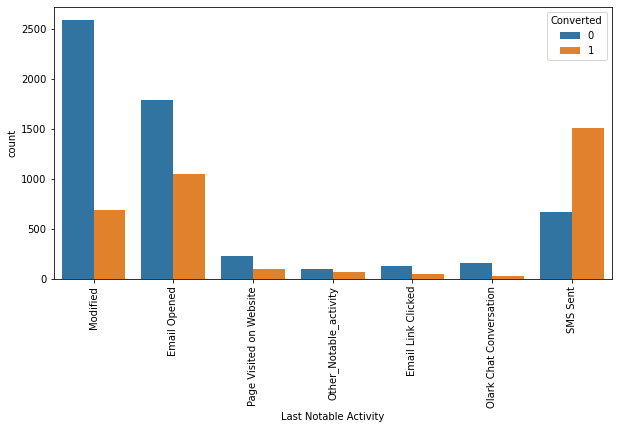

In [75]:
#plotting
plt.figure(figsize=(10,5))
sns.countplot(x='Last Notable Activity', hue='Converted', data=lead)
plt.xticks(rotation='vertical')
plt.show()

In [76]:
#list of dropping columns
cols_to_drop

['Country',
 'What matters most to you in choosing a course',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [77]:
lead=lead.drop(cols_to_drop, 1)

In [78]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Do Not Email                            9103 non-null   object 
 3   Converted                               9103 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9103 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9103 non-null   object 
 8   Specialization                          9103 non-null   object 
 9   What is your current occupation         9103 non-null   object 
 10  Tags                                    9103 non-null   obje

### Checking the Correlation and Outliers

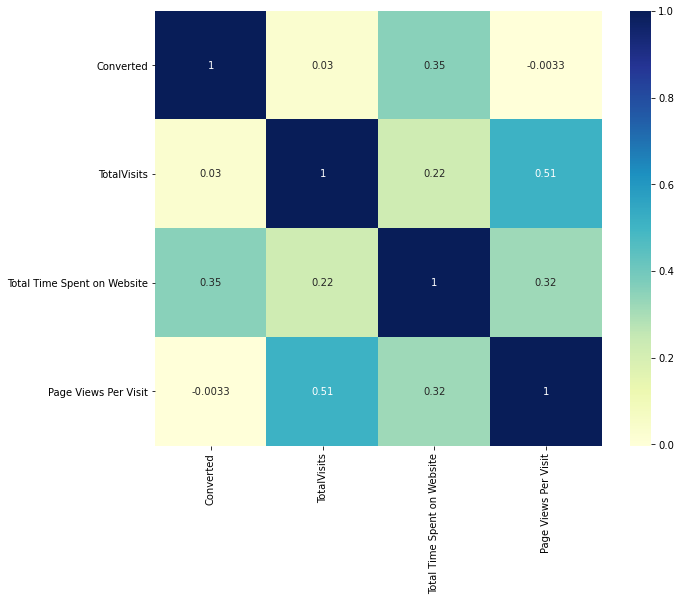

In [79]:
plt.figure(figsize=(10,8))
sns.heatmap(lead.corr(), cmap='YlGnBu', annot=True)
plt.show()

- The highest correlation is Total Visits with Total Time Spent on Website.
- Converted with Page Views Per Visit is negatively correlated with each other.

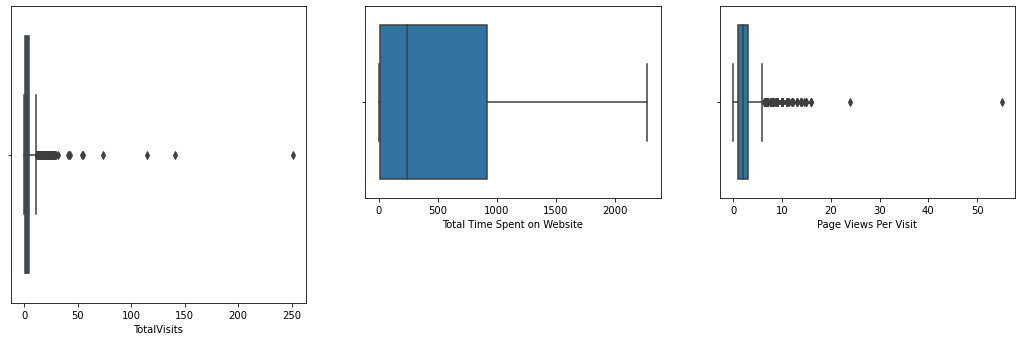

In [80]:
#checking the outliers
plt.figure(figsize=[18,12])

plt.subplot(2,3,1)
sns.boxplot(lead['TotalVisits'])

plt.subplot(3,3,2)
sns.boxplot(lead['Total Time Spent on Website'])

plt.subplot(3,3,3)
sns.boxplot(lead['Page Views Per Visit'])
plt.show()

#### Treating Outliers

In [81]:
def outlier_treatment(country_lead, col):
    
    Q1 = lead[col].quantile(0.25)

    Q3 = lead[col].quantile(0.75)

    IQR = Q3 - Q1

    lower_cap  = Q1-1.5*IQR

    higher_cap = Q3+1.5*IQR

    lead.loc[(lead[col] > higher_cap), col] = higher_cap
    lead.loc[(lead[col] < lower_cap), col] = lower_cap
    
    return lead

In [82]:
lead = outlier_treatment(lead, 'TotalVisits')
lead = outlier_treatment(lead, 'Total Time Spent on Website')
lead = outlier_treatment(lead, 'Page Views Per Visit')

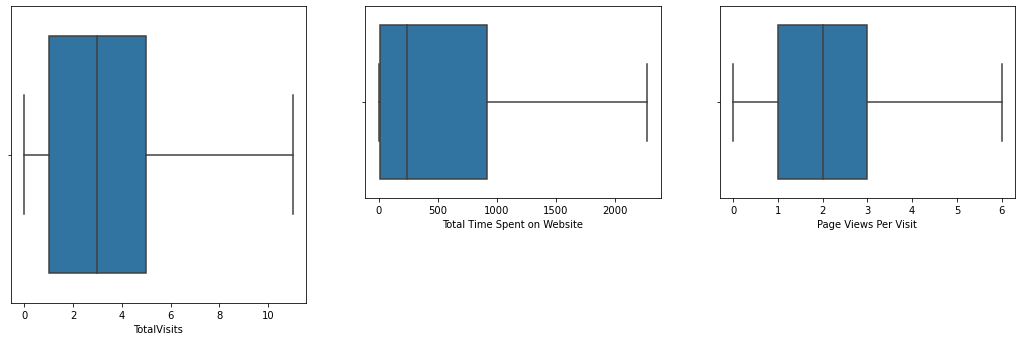

In [83]:
#checking the outliers again
plt.figure(figsize=[18,12])

plt.subplot(2,3,1)
sns.boxplot(lead['TotalVisits'])

plt.subplot(3,3,2)
sns.boxplot(lead['Total Time Spent on Website'])

plt.subplot(3,3,3)
sns.boxplot(lead['Page Views Per Visit'])
plt.show()

So, now there is no outliers in above charts.

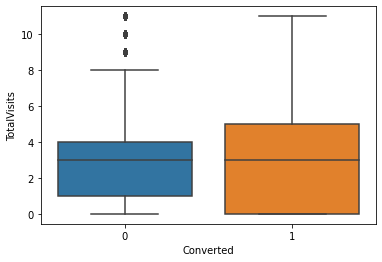

In [84]:
#checking Spread of "Total Visits" vs Converted variable
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead)
plt.show()

- Median of both converted and non-converted is same.

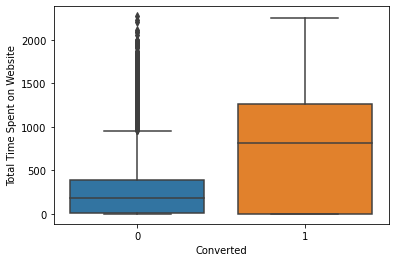

In [85]:
#checking Spread of "Total Time Spent on Website" vs Converted variable

sns.boxplot(x=lead.Converted, y=lead['Total Time Spent on Website'])
plt.show()

Inference:
- Leads spending more time on the website are more likely to be converted.
- Website should be made more engaging to make leads spend more time

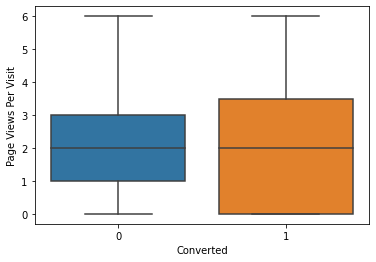

In [86]:
#checking Spread of "Page Views Per Visit" vs Converted variable
sns.boxplot(x=lead.Converted,y=lead['Page Views Per Visit'])
plt.show()

Inference:
- Median for converted and unconverted lead is the same.
- Nothing can be said specifically for lead conversion from Page Views Per Visit

In [87]:
#checking missing values in leftover columns/
round(100*(lead.isnull().sum()/len(lead.index)),2)

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Tags                                      0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

# Data Transformation

### Dummy Variables

In [88]:
#Now making the list of categorical variables
categorical_cols=lead.select_dtypes(include=['object']).columns
print(categorical_cols)

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity', 'Specialization', 'What is your current occupation', 'Tags', 'City', 'A free copy of Mastering The Interview', 'Last Notable Activity'], dtype='object')


In [89]:
# List of variables to map

varlist =  ['A free copy of Mastering The Interview','Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
lead[varlist] = lead[varlist].apply(binary_map)

In [90]:
lead[varlist].head()

,A free copy of Mastering The Interview,Do Not Email
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [91]:
lead.shape

(9103, 14)

### For categorical variables with multiple levels, create dummy features

In [92]:
# Creating dummy variables for the categorical variables and dropping the level with big names.
lead_dummy = pd.get_dummies(lead[['Lead Origin','What is your current occupation',
                             'City']], drop_first=True)

lead = pd.concat([lead,lead_dummy],1)

In [93]:
# Creating dummy variables for the variable 'Specialization'
lead_dummy = pd.get_dummies(lead['Specialization'], prefix  = 'Specialization')
lead_dummy = lead_dummy.drop(['Specialization_Not Specified'], 1)
lead = pd.concat([lead, lead_dummy], axis = 1)

In [94]:
# Creating dummy variables for the variable 'Lead Source'
lead_dummy = pd.get_dummies(lead['Lead Source'], prefix  = 'Lead Source')
lead_dummy = lead_dummy.drop(['Lead Source_Others'], 1)
lead = pd.concat([lead, lead_dummy], axis = 1)

In [95]:
# Creating dummy variables for the variable 'Last Activity'
lead_dummy = pd.get_dummies(lead['Last Activity'], prefix  = 'Last Activity')
lead_dummy = lead_dummy.drop(['Last Activity_Others'], 1)
lead = pd.concat([lead, lead_dummy], axis = 1)

In [96]:
# Creating dummy variables for the variable 'Last Notable Activity'
lead_dummy = pd.get_dummies(lead['Last Notable Activity'], prefix  = 'Last Notable Activity')
lead_dummy = lead_dummy.drop(['Last Notable Activity_Other_Notable_activity'], 1)
lead = pd.concat([lead, lead_dummy], axis = 1)

In [97]:
# Creating dummy variables for the variable 'Tags'
lead_dummy = pd.get_dummies(lead['Tags'], prefix  = 'Tags')
lead_dummy = lead_dummy.drop(['Tags_Not Sure'], 1)
lead = pd.concat([lead, lead_dummy], axis = 1)

In [98]:
lead.head(2)

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
0,API,Olark Chat,0,0,0.0,0.0,0.0,Page Visited on Website,Not Specified,Unemployed,Interested in other courses,Mumbai,0,Modified,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1,API,Organic Search,0,0,5.0,674.0,2.5,Email Opened,Not Specified,Unemployed,Ringing,Mumbai,0,Email Opened,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [99]:
lead.shape

(9103, 67)

In [100]:
#Now drop the original columns after dummy variable creation
lead.drop(categorical_cols,1,inplace = True)

In [101]:
lead.shape

(9103, 57)

# Data Preparation

# Train-Test Split

In [102]:
# Separating target varaible from dependent variable
#Putting response variable to y
y=lead['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [103]:
# Putting dependent variable in a new dataset called 'X'
X=lead.drop('Converted', axis=1)
X.head(2)

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1,5.0,674.0,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [104]:
#Splitting the dataset into train and test
X_train, X_test, y_train, y_test=train_test_split(X,y, train_size=0.7, test_size=0.3, random_state=100)

In [105]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6372 entries, 7962 to 5734
Data columns (total 56 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TotalVisits                                           6372 non-null   float64
 1   Total Time Spent on Website                           6372 non-null   float64
 2   Page Views Per Visit                                  6372 non-null   float64
 3   Lead Origin_Landing Page Submission                   6372 non-null   uint8  
 4   Lead Origin_Lead Add Form                             6372 non-null   uint8  
 5   Lead Origin_Lead Import                               6372 non-null   uint8  
 6   What is your current occupation_Housewife             6372 non-null   uint8  
 7   What is your current occupation_Other                 6372 non-null   uint8  
 8   What is your current occupation_Student               6

## Feature Scaling 

In [106]:
from sklearn.preprocessing import StandardScaler

In [107]:
scaler=StandardScaler()

In [108]:
#scaling numeric columns
numeric_cols=X_train.select_dtypes(include=['float64', 'int64']).columns
X_train[numeric_cols]=scaler.fit_transform(X_train[numeric_cols])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
7962,-0.079783,1.476324,-0.423364,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
5520,1.299804,-0.771066,2.083179,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
1962,0.610010,-0.571257,0.133646,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
1566,2.679391,1.393834,0.690655,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
9170,-1.114473,-0.881052,-1.258878,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [109]:
X_train.shape

(6372, 56)

In [110]:
# Checking the conversion rate from 'converted' column as it denotes the target variable
(sum(y)/len(y.index))*100

38.02043282434362

We have conversion rate of almost 38%

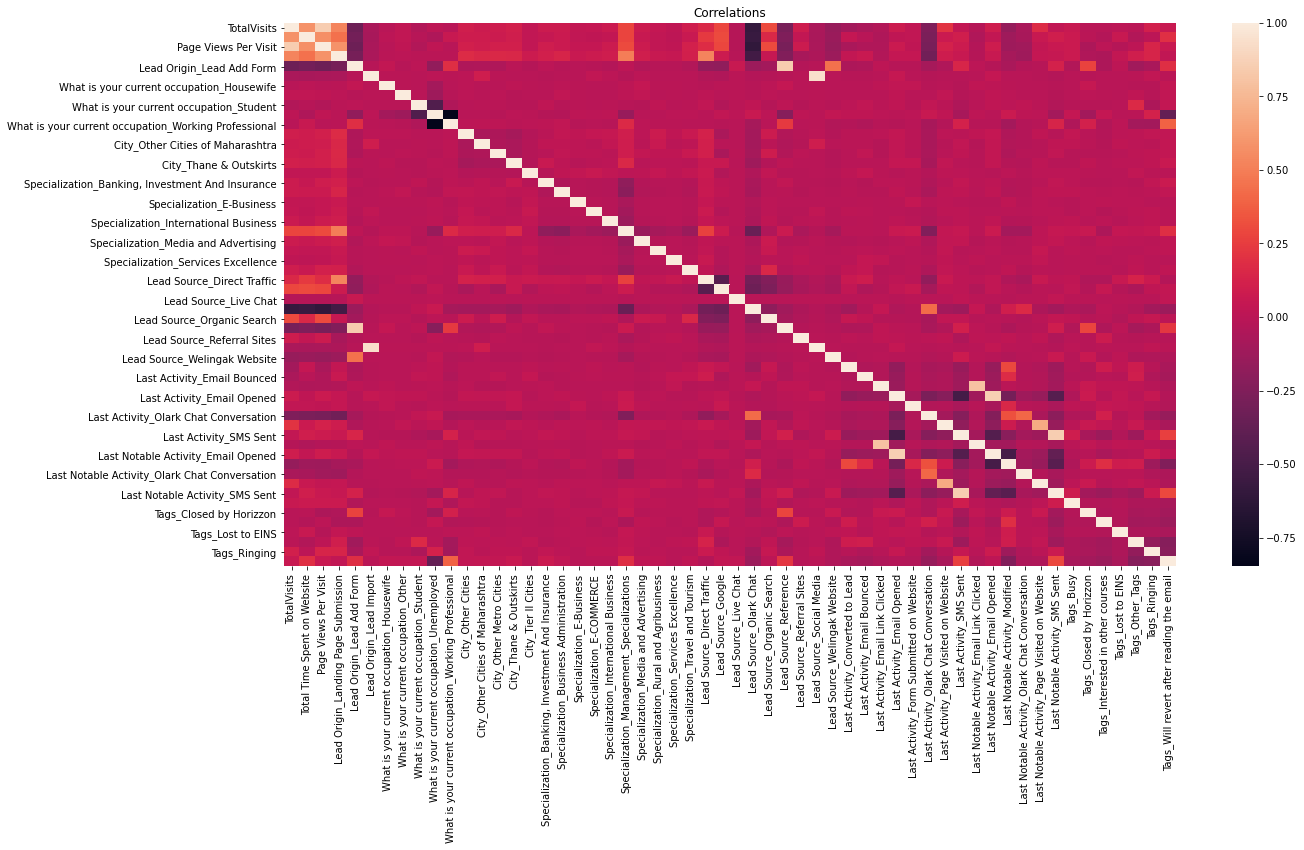

In [111]:
#setting the figure size
plt.figure(figsize=(20,10))

# setting the title
plt.title('Correlations')

# Plotting a heatmap
sns.heatmap(X.corr(method='spearman'))
plt.show()

We already handled the correlation in the EDA steps above so there is no correlation in the dataset now.

# Model Building

#### Here we will use rfe for feature selection as we have lot of variables and checking one by one is not an efficient way to do so.

## Using Statsmodel and RFE

In [112]:
import statsmodels.api as sm

In [113]:
# Importing necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

logreg=LogisticRegression() 

In [114]:
# running RFE with 15 variables as output
rfe=RFE(logreg, 15)
rfe=rfe.fit(X_train, y_train)

In [115]:
rfe.support_

array([False,  True, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False,  True, False,  True, False,  True, False,
       False, False, False, False, False, False,  True, False, False,
        True,  True, False, False, False,  True,  True,  True,  True,
        True,  True])

In [116]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 20),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 19),
 ('Lead Origin_Landing Page Submission', False, 10),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 22),
 ('What is your current occupation_Housewife', False, 26),
 ('What is your current occupation_Other', False, 35),
 ('What is your current occupation_Student', False, 17),
 ('What is your current occupation_Unemployed', False, 16),
 ('What is your current occupation_Working Professional', False, 5),
 ('City_Other Cities', False, 28),
 ('City_Other Cities of Maharashtra', False, 27),
 ('City_Other Metro Cities', False, 31),
 ('City_Thane & Outskirts', False, 36),
 ('City_Tier II Cities', False, 21),
 ('Specialization_Banking, Investment And Insurance', False, 25),
 ('Specialization_Business Administration', False, 38),
 ('Specialization_E-Business', False, 18),
 ('Specialization_E-COMMERCE', False, 14),
 ('Specialization_International Business', F

In [117]:
# Put all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]
print(col)

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form', 'Lead Source_Direct Traffic', 'Lead Source_Organic Search', 'Lead Source_Referral Sites', 'Lead Source_Welingak Website', 'Last Activity_SMS Sent', 'Last Notable Activity_Modified', 'Last Notable Activity_Olark Chat Conversation', 'Tags_Closed by Horizzon', 'Tags_Interested in other courses', 'Tags_Lost to EINS', 'Tags_Other_Tags', 'Tags_Ringing', 'Tags_Will revert after reading the email'], dtype='object')


In [118]:
# Selecting columns selected by RFE
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import', 'What is your current occupation_Housewife', 'What is your current occupation_Other', 'What is your current occupation_Student', 'What is your current occupation_Unemployed', 'What is your current occupation_Working Professional', 'City_Other Cities', 'City_Other Cities of Maharashtra', 'City_Other Metro Cities', 'City_Thane & Outskirts', 'City_Tier II Cities', 'Specialization_Banking, Investment And Insurance', 'Specialization_Business Administration', 'Specialization_E-Business', 'Specialization_E-COMMERCE', 'Specialization_International Business', 'Specialization_Management_Specializations', 'Specialization_Media and Advertising', 'Specialization_Rural and Agribusiness', 'Specialization_Services Excellence', 'Specialization_Travel and Tourism', 'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_Olark Chat', 'Lead Source_Reference', 'Lead Source_Social Media',
    

In [119]:
#Building First model
X_train_sm=sm.add_constant(X_train[col])
logm1=sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res=logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6356
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1280.4
Date:                Sat, 06 Feb 2021   Deviance:                       2560.8
Time:                        12:37:13   Pearson chi2:                 7.92e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.0401      0.087    -11.983      0.000      -1.210      -0.870
Total Time Spent on Website                       0.9003      0.053     16.984      0.000       0.796       1.004
Lead Origin_Lead Add Form                         1.5025      0.421      3.568      0.000       0.677       2.328
Lead Source_Direct Traffic                       -0.7032      0.130     -5.417      0.000      -0.958      -0.449
Lead Source_Organic Search                       -0.3324      0.158     -2.098      0.036      -0.643      -0.022
Lead Source_Referral Sites                       -0.6139      0.485     -1.266      0.205      -1.564       0.336
Lead Source_Welingak Website                      3.2939      0.841      3.916      0.000       1.645       4.942
Last Activity_SMS Sent                            1.8668      0.113     16.579      0.000       1.646       2.088
Last Notable Activity_Modified                   -1.6917      0.126    -13.423      0.000      -1.939      -1.445
Last Notable Activity_Olark Chat Conversation    -1.3572      0.407     -3.332      0.001      -2.156      -0.559
Tags_Closed by Horizzon                           6.5373      0.733      8.918      0.000       5.101       7.974
Tags_Interested in other courses                 -1.9997      0.370     -5.410      0.000      -2.724      -1.275
Tags_Lost to EINS                                 6.3812      0.730      8.745      0.000       4.951       7.811
Tags_Other_Tags                                  -2.4133      0.211    -11.463      0.000      -2.826      -2.001
Tags_Ringing                                     -3.4914      0.244    -14.316      0.000      -3.969      -3.013
Tags_Will revert after reading the email          4.4495      0.188     23.708      0.000       4.082       4.817
=================================================================================================================
"""

According to the summary we have higher p-value of variable 'Lead Source_Referral Sites. So, we can drop this.

In [120]:
#Now drop that column which have higher p-value
col=col.drop('Lead Source_Referral Sites',1)
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form', 'Lead Source_Direct Traffic', 'Lead Source_Organic Search', 'Lead Source_Welingak Website', 'Last Activity_SMS Sent', 'Last Notable Activity_Modified', 'Last Notable Activity_Olark Chat Conversation', 'Tags_Closed by Horizzon', 'Tags_Interested in other courses', 'Tags_Lost to EINS', 'Tags_Other_Tags', 'Tags_Ringing', 'Tags_Will revert after reading the email'], dtype='object')

In [121]:
# Building Second model
X_train_sm=sm.add_constant(X_train[col])
logm2=sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res=logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6357
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1281.3
Date:                Sat, 06 Feb 2021   Deviance:                       2562.6
Time:                        12:37:14   Pearson chi2:                 7.92e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.0561      0.086    -12.284      0.000      -1.225      -0.888
Total Time Spent on Website                       0.8993      0.053     16.965      0.000       0.795       1.003
Lead Origin_Lead Add Form                         1.5133      0.421      3.595      0.000       0.688       2.338
Lead Source_Direct Traffic                       -0.6903      0.129     -5.332      0.000      -0.944      -0.437
Lead Source_Organic Search                       -0.3192      0.158     -2.019      0.043      -0.629      -0.009
Lead Source_Welingak Website                      3.2955      0.841      3.918      0.000       1.647       4.944
Last Activity_SMS Sent                            1.8724      0.112     16.646      0.000       1.652       2.093
Last Notable Activity_Modified                   -1.6887      0.126    -13.404      0.000      -1.936      -1.442
Last Notable Activity_Olark Chat Conversation    -1.3418      0.407     -3.295      0.001      -2.140      -0.544
Tags_Closed by Horizzon                           6.5432      0.733      8.927      0.000       5.107       7.980
Tags_Interested in other courses                 -2.0297      0.369     -5.496      0.000      -2.754      -1.306
Tags_Lost to EINS                                 6.3878      0.730      8.754      0.000       4.958       7.818
Tags_Other_Tags                                  -2.4115      0.211    -11.455      0.000      -2.824      -1.999
Tags_Ringing                                     -3.4864      0.244    -14.299      0.000      -3.964      -3.009
Tags_Will revert after reading the email          4.4491      0.188     23.707      0.000       4.081       4.817
=================================================================================================================
"""

According to the summary we have higher p-value of variable 'Lead Source_Organic Search'. So, we can drop this

In [122]:
col=col.drop('Lead Source_Organic Search',1)

In [123]:
#building Third model
X_train_sm=sm.add_constant(X_train[col])
logm3=sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res=logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6358
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1283.4
Date:                Sat, 06 Feb 2021   Deviance:                       2566.7
Time:                        12:37:14   Pearson chi2:                 8.18e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.1074      0.082    -13.434      0.000      -1.269      -0.946
Total Time Spent on Website                       0.8842      0.052     16.887      0.000       0.782       0.987
Lead Origin_Lead Add Form                         1.5711      0.420      3.739      0.000       0.748       2.395
Lead Source_Direct Traffic                       -0.6217      0.125     -4.986      0.000      -0.866      -0.377
Lead Source_Welingak Website                      3.2811      0.841      3.902      0.000       1.633       4.929
Last Activity_SMS Sent                            1.8556      0.112     16.571      0.000       1.636       2.075
Last Notable Activity_Modified                   -1.6850      0.126    -13.393      0.000      -1.932      -1.438
Last Notable Activity_Olark Chat Conversation    -1.3101      0.408     -3.214      0.001      -2.109      -0.511
Tags_Closed by Horizzon                           6.5311      0.733      8.912      0.000       5.095       7.967
Tags_Interested in other courses                 -2.0212      0.370     -5.470      0.000      -2.745      -1.297
Tags_Lost to EINS                                 6.3991      0.730      8.770      0.000       4.969       7.829
Tags_Other_Tags                                  -2.4298      0.210    -11.571      0.000      -2.841      -2.018
Tags_Ringing                                     -3.5002      0.244    -14.366      0.000      -3.978      -3.023
Tags_Will revert after reading the email          4.4309      0.187     23.701      0.000       4.064       4.797
=================================================================================================================
"""

Since 'All' the p-values are less we can check the Variance Inflation Factor to see if there is any correlation between the variables.

### Checking VIF's

In [124]:
# check for the VIF values for the features variables 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [125]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif=pd.DataFrame()
vif['Features']=X_train[col].columns
vif['VIF']=[variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF']= round(vif['VIF'], 2)
vif=vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,1.80
12,Tags_Will revert after reading the email,1.54
4,Last Activity_SMS Sent,1.47
5,Last Notable Activity_Modified,1.41
2,Lead Source_Direct Traffic,1.38
3,Lead Source_Welingak Website,1.35
10,Tags_Other_Tags,1.25
0,Total Time Spent on Website,1.22
7,Tags_Closed by Horizzon,1.22
11,Tags_Ringing,1.16


All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only.

## Creating Predictions for train set.

In [126]:
# Predicting the probabilities on the train set
y_train_pred=res.predict(X_train_sm)
y_train_pred[:10]

7962    0.407026
5520    0.082342
1962    0.020398
1566    0.989604
9170    0.013174
5097    0.131648
8954    0.028595
309     0.951233
5519    0.492276
1050    0.986739
dtype: float64

In [127]:
#Reshaping to an array
y_train_pred=y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.40702555, 0.08234249, 0.02039757, 0.98960429, 0.01317367,
       0.1316476 , 0.02859505, 0.95123322, 0.49227628, 0.98673851])

In [129]:
#Creating a dataframe with the actual conversion rate and the predicted probabilities
y_train_pred_final=pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID']=y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.407026,7962
1,0,0.082342,5520
2,0,0.020398,1962
3,1,0.989604,1566
4,0,0.013174,9170


In [131]:
#Creating new column 'predicted' with 1 if Converted_prob > 0.5 else 0
y_train_pred_final['Predicted']=y_train_pred_final.Converted_prob.map(lambda x: 1 if x>0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.407026,7962,0
1,0,0.082342,5520,0
2,0,0.020398,1962,0
3,1,0.989604,1566,1
4,0,0.013174,9170,0


# Model Evaluation

In [132]:
# Importing metrics from sklearn for evaluation
from sklearn import metrics

In [133]:
#creating confusion matrix
confusion=metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
confusion

array([[3771,  182],
       [ 346, 2073]], dtype=int64)

In [135]:
# Predicted     not_churn    churn
# Actual
# not_churn        3771      182
# churn            346       2073 

In [134]:
# check overall accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9171374764595104


In [136]:
TP= confusion[1,1]  #Ture Positive
TN= confusion[0,0]  #True Negative
FP= confusion[0,1]  #False Positive
FN= confusion[1,0]  #False Negative

In [137]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8569656883009508

In [138]:
# Let us calculate specificity
TN / float(TN+FP)

0.953959018466987

In [139]:
# Calculate false postive rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.0460409815330129


In [140]:
# positive predictive value 
print (TP / float(TP+FP))

0.9192904656319291


In [141]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9159582220063153


## Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [142]:
def draw_roc(actual, probs):
    fpr, tpr, thresholds=metrics.roc_curve(actual, probs, drop_intermediate=False)
    auc_score=metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=[5,5])
    plt.plot(fpr, tpr, label='ROC curve(area=%0.2f)' % auc_score)
    plt.plot([0,1], [0,1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1-True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristics example')
    plt.legend(loc="lower right")
    plt.show()
    
    return None

In [144]:
fpr, tpr, thresholds=metrics.roc_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob, 
                                       drop_intermediate=False)

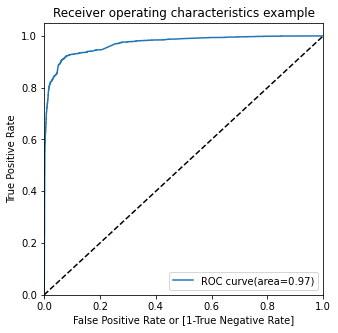

In [145]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

The ROC Curve should be a value close to 1. We are getting a good value of 0.97 indicating a good predictive model.

## Finding Optimal Cutoff Point
Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [146]:
# Let's create columns with different probability cutoffs
numbers=[float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x>i else 0)
y_train_pred_final.head()  

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.407026,7962,0,1,1,1,1,1,0,0,0,0,0
1,0,0.082342,5520,0,1,0,0,0,0,0,0,0,0,0
2,0,0.020398,1962,0,1,0,0,0,0,0,0,0,0,0
3,1,0.989604,1566,1,1,1,1,1,1,1,1,1,1,1
4,0,0.013174,9170,0,1,0,0,0,0,0,0,0,0,0


In [148]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df=pd.DataFrame(columns=['prob', 'accuracy', 'sensi', 'speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for i in num:
    cm1=metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i])
    total1=sum(sum(cm1))
    accuracy=(cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.379630  1.000000  0.000000
0.1   0.1  0.814815  0.976023  0.716165
0.2   0.2  0.903327  0.931377  0.886162
0.3   0.3  0.922944  0.914841  0.927903
0.4   0.4  0.925141  0.900785  0.940046
0.5   0.5  0.917137  0.856966  0.953959
0.6   0.6  0.918079  0.832162  0.970655
0.7   0.7  0.916667  0.813559  0.979762
0.8   0.8  0.907250  0.779661  0.985328
0.9   0.9  0.887790  0.719305  0.990893


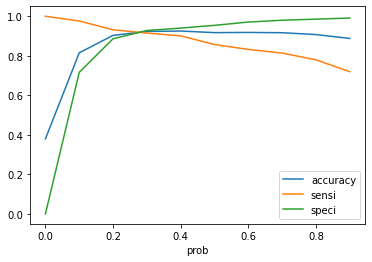

In [150]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [151]:
y_train_pred_final['final_predicted']=y_train_pred_final.Converted_prob.map(lambda x: 1 if x>0.3 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.407026,7962,0,1,1,1,1,1,0,0,0,0,0,1
1,0,0.082342,5520,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.020398,1962,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.989604,1566,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.013174,9170,0,1,0,0,0,0,0,0,0,0,0,0


In [153]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9229441305712492

In [154]:
confusion2=metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
confusion2

array([[3668,  285],
       [ 206, 2213]], dtype=int64)

In [155]:
TP=confusion2[1,1]    #True-Positive
TN=confusion2[0,0]    #True-Negative
FP=confusion2[0,1]    #False-Positive
FN=confusion2[1,0]    #False-Negative

In [156]:
# Let's see the sensitivity of our logistic regression model
TP/float(TP+FN)

0.9148408433236874

In [157]:
#Let us calculate specificity
TN/float(TN+FP)

0.9279028585884138

In [159]:
# Calculate false postive rate - predicting conversion when customer does not have convert
print(FP/float(TN+FP))

0.07209714141158614


In [160]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8859087269815853


In [161]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9468249870934434


Observation:
So as we can see above the model seems to be performing well. The ROC curve has a value of 0.97, which is very good. We have the following values for the Train Data:

- Accuracy : 92.29%
- Sensitivity : 91.38%
- Specificity : 92.79%

### Precision and Recall

In [165]:
#Looking at the confusion matrix again
confusion=metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
confusion

array([[3668,  285],
       [ 206, 2213]], dtype=int64)

###### Precision
TP / TP + FP

In [166]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8859087269815853

###### Recall
TP / TP + FN

In [167]:
confusion[1,1]/(confusion[1,1]+confusion[1,0])

0.9148408433236874

##### Using sklearn utilities for the same

In [168]:
from sklearn.metrics import precision_score, recall_score

In [169]:
?precison_score

Object `precison_score` not found.


In [170]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8859087269815853

In [171]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9148408433236874

### Precision and recall tradeoff 

In [174]:
from sklearn.metrics import precision_recall_curve

In [175]:
y_train_pred_final.Converted, y_train_pred_final.final_predicted

(0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6367    0
 6368    1
 6369    1
 6370    1
 6371    0
 Name: Converted, Length: 6372, dtype: int64,
 0       1
 1       0
 2       0
 3       1
 4       0
        ..
 6367    0
 6368    1
 6369    1
 6370    1
 6371    0
 Name: final_predicted, Length: 6372, dtype: int64)

In [176]:
p, r, thresholds=precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

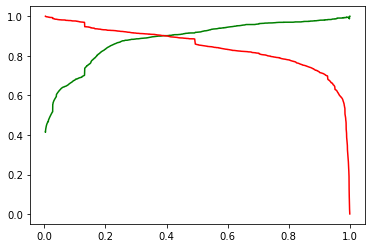

In [177]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Scaling the test set

In [179]:
numeric_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[numeric_cols] = scaler.fit_transform(X_test[numeric_cols])

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
3504,-0.068989,-0.108519,0.416452,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4050,-1.125494,-0.888077,-1.263530,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
7201,-0.421158,0.420993,-0.143542,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
1196,0.283179,-0.110357,0.976446,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
8219,1.339684,-0.433947,-0.283540,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0


In [180]:
X_test.shape

(2731, 56)

In [182]:
# Select the columns for X_test as well
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Welingak Website,Last Activity_SMS Sent,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
3504,-0.108519,0,0,0,0,0,0,0,0,0,0,1,0
4050,-0.888077,1,0,0,1,0,0,0,0,0,0,0,1
7201,0.420993,0,1,0,1,0,0,0,0,0,1,0,0
1196,-0.110357,0,0,0,0,0,0,0,0,0,0,1,0
8219,-0.433947,0,1,0,0,0,0,0,0,1,0,0,0


In [183]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

### Predictions of Test set

In [187]:
y_test_sm=res.predict(X_test_sm)
y_test_sm[:10]

3504    0.008982
4050    0.997439
7201    0.126625
1196    0.008967
8219    0.986430
8747    0.130939
9048    0.716321
6524    0.003244
7693    0.054699
8187    0.122805
dtype: float64

In [190]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred_1 = pd.DataFrame(y_test_pred)
y_test_pred_1.head()

,0
3504,0.008982
4050,0.997439
7201,0.126625
1196,0.008967
8219,0.986430


In [191]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [192]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [193]:
# Removing index for both dataframes to append them side by side 
y_test_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [196]:
# Appending y_test_df and y_test_pred_1
y_pred_final = pd.concat([y_test_df, y_test_pred_1],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3504,0.008982
1,1,4050,0.997439
2,0,7201,0.126625
3,0,1196,0.008967
4,1,8219,0.986430


In [197]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,3504,0.008982
1,1,4050,0.997439
2,0,7201,0.126625
3,0,1196,0.008967
4,1,8219,0.986430


In [198]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [199]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,3504,0,0.008982,1
1,4050,1,0.997439,100
2,7201,0,0.126625,13
3,1196,0,0.008967,1
4,8219,1,0.986430,99


In [202]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,3504,0,0.008982,1,0
1,4050,1,0.997439,100,1
2,7201,0,0.126625,13,0
3,1196,0,0.008967,1,0
4,8219,1,0.986430,99,1


In [203]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9289637495422922

In [204]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1575,  114],
       [  80,  962]], dtype=int64)

In [205]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [206]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9232245681381958

In [207]:
# Let us calculate specificity
TN / float(TN+FP)

0.9325044404973357

##### Precision and Recall for the test set

In [208]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.8940520446096655

In [209]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9232245681381958

##### Observation:
After running the model on the Test Data these are the figures we obtain:

Accuracy : 92.89%
Sensitivity : 92.32%
Specificity : 93.25%

### Final Observation:
Let us compare the values obtained for Train & Test:

#### Train Data: 
- Accuracy : 92.29%
- Sensitivity : 91.38%
- Specificity : 92.79%

#### Test Data: 
- Accuracy : 92.89%
- Sensitivity : 92.32%
- Specificity : 93.25%

# Conclusion:


Important features responsible for good conversion rate or the ones' which contributes more towards the probability of a lead getting converted are:

- Lead Origin_Lead Add Form
- Lead Source_Direct Traffic
- Lead Source_Welingak Website
- Last Activity_SMS Sent
- Last Notable Activity_Modified

We got Accuracy, Precison and Recall for the both Training and Test set.

We got high recall score than precision score which we were exactly looking for.

The Model seems to predict the Conversion Rate very well.

Keeping these in mind the X Education can flourish as they have a very high chance to get almost all the potential buyers to change their mind and buy their courses.